# Modeling and Simulation in Python

Chapter 3:

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


We'll start with the same code we saw last time: the magic command that tells Jupyter where to put the figures, and the import statement that gets the function defined in the `modsim` module.

In [1]:
# If you want the figures to appear in the notebook, use
# %matplotlib notebook

# If you want the figures to appear in separate windows, use
# %matplotlib qt

# To switch from one to another, you have to select Kernel->Restart

%matplotlib notebook

from modsim import *

In [2]:
from pandas import read_html

In [48]:
# The data directory contains a downloaded copy of
# https://en.wikipedia.org/wiki/World_population_estimates

filename = 'data/World_population_estimates.html'
dfs = read_html(filename, header=0, index_col=0, decimal='M')

In [6]:
df2 = dfs[2]
df2.head()

,United States Census Bureau (2015)[18],Population Reference Bureau (1973–2015)[6],United Nations Department of Economic and Social Affairs (2015)[7],Maddison (2008)[8],HYDE (2007)[15],Tanton (1994)[9],Biraben (1980)[10],McEvedy & Jones (1978)[11],Thomlinson (1975)[12],Durand (1974)[13],Clark (1967)[14]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2525149000,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2572850917,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2619292068,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2665865392,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2713172027,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df2.tail()

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
2011,6944055583,6.986951e+09,6997998760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,7022349283,7.057075e+09,7080072417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,7101027895,7.136796e+09,7162119434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,7178722893,7.238184e+09,7243784000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,7256490011,7.336435e+09,7349472000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df2.columns = ['census', 'prb', 'un', 'maddison', 
               'hyde', 'tanton', 'biraben', 'mj', 
               'thomlinson', 'durand', 'clark']

In [8]:
census = df2.census
census

Year
1950    2557628654
1951    2594939877
1952    2636772306
1953    2682053389
1954    2730228104
1955    2782098943
1956    2835299673
1957    2891349717
1958    2948137248
1959    3000716593
1960    3043001508
1961    3083966929
1962    3140093217
1963    3209827882
1964    3281201306
1965    3350425793
1966    3420677923
1967    3490333715
1968    3562313822
1969    3637159050
1970    3712697742
1971    3790326948
1972    3866568653
1973    3942096442
1974    4016608813
1975    4089083233
1976    4160185010
1977    4232084578
1978    4304105753
1979    4379013942
           ...    
1986    4940571232
1987    5027200492
1988    5114557167
1989    5201440110
1990    5288955934
1991    5371585922
1992    5456136278
1993    5538268316
1994    5618682132
1995    5699202985
1996    5779440593
1997    5857972543
1998    5935213248
1999    6012074922
2000    6088571383
2001    6165219247
2002    6242016348
2003    6318590956
2004    6395699509
2005    6473044732
2006    6551263534
2007   

In [9]:
type(census)

pandas.core.series.Series

In [10]:
census.values

array([2557628654, 2594939877, 2636772306, 2682053389, 2730228104,
       2782098943, 2835299673, 2891349717, 2948137248, 3000716593,
       3043001508, 3083966929, 3140093217, 3209827882, 3281201306,
       3350425793, 3420677923, 3490333715, 3562313822, 3637159050,
       3712697742, 3790326948, 3866568653, 3942096442, 4016608813,
       4089083233, 4160185010, 4232084578, 4304105753, 4379013942,
       4451362735, 4534410125, 4614566561, 4695736743, 4774569391,
       4856462699, 4940571232, 5027200492, 5114557167, 5201440110,
       5288955934, 5371585922, 5456136278, 5538268316, 5618682132,
       5699202985, 5779440593, 5857972543, 5935213248, 6012074922,
       6088571383, 6165219247, 6242016348, 6318590956, 6395699509,
       6473044732, 6551263534, 6629913759, 6709049780, 6788214394,
       6866332358, 6944055583, 7022349283, 7101027895, 7178722893,
       7256490011])

In [11]:
census.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='Year')

In [12]:
def plot_estimates(df):
    un = df.un / 1e9
    census = df.census / 1e9
    plot(un, '-', color='blue', label='UN DESA')
    plot(census, '-', color='green', label='US Census')

<IPython.core.display.Javascript object>


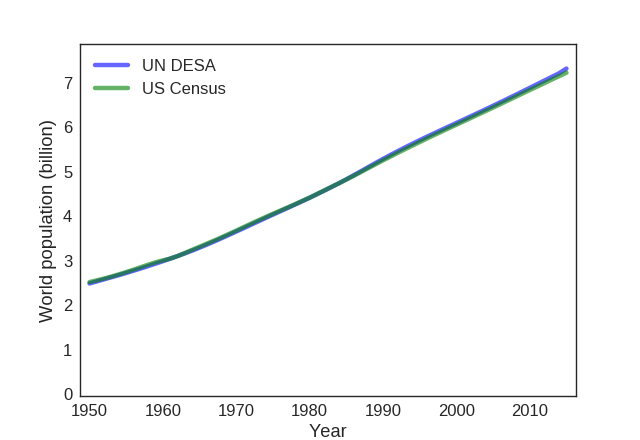

In [13]:
newfig()
plot_estimates(df2)
annotate(xlabel='Year',
         ylabel='World population (billion)',
         ylim=[0, 7.9])

In [14]:
census = df2.census / 1e9

In [15]:
model = Series([])

In [16]:
model[1950] = census[1950]
model

1950    2.557629
dtype: float64

In [17]:
for year in arange(1951, 2016):
    model[year] = model[year-1]

<IPython.core.display.Javascript object>


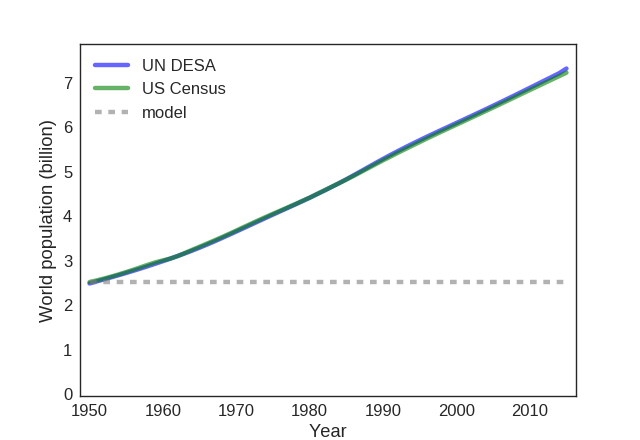

In [18]:
newfig()
plot_estimates(df2)
plot(model, '--', color='gray', label='model')
annotate(xlabel='Year',
         ylabel='World population (billion)',
         ylim=[0, 7.9])

### Constant growth

In [19]:
first_year = census.index[0]
last_year = census.index[-1]
first_year, last_year

(1950, 2015)

In [20]:
total_growth = census[last_year] - census[first_year]
elapsed_time = last_year - first_year
annual_growth = total_growth / (elapsed_time)
annual_growth

0.07229017472307693

In [21]:
for year in arange(1951, 2016):
    model[year] = model[year-1] + annual_growth

<IPython.core.display.Javascript object>


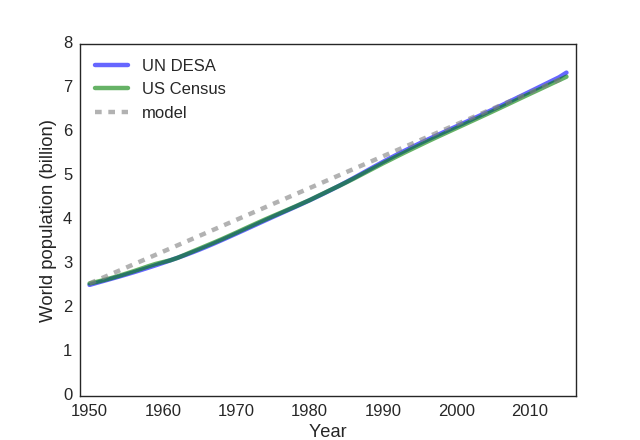

In [22]:
newfig()
plot_estimates(df2)
plot(model, '--', color='gray', label='model')
annotate(xlabel='Year', ylabel='World population (billion)', ylim=[0, 8])

### Now with state objects

In [23]:
def run_model1(state):
    model = Series([])
    model[state.t0] = state.initial_pop
    for year in arange(state.t0+1, state.t_end+1):
        model[year] = model[year-1] + state.annual_growth
    state.model = model

In [24]:
def plot_model(state):
    newfig()
    plot_estimates(df2)
    plot(state.model, '--', color='gray', label='model')
    annotate(xlabel='Year', 
             ylabel='World population (billion)',
             ylim=[0, 8])

<IPython.core.display.Javascript object>


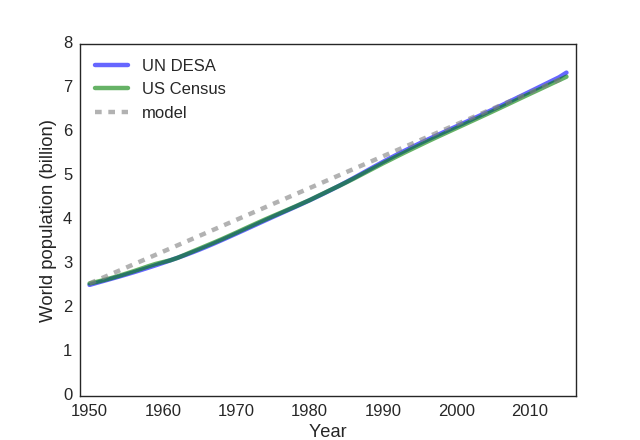

In [25]:
state = State(t0=first_year, t_end=last_year,
              initial_pop=census[first_year],
              annual_growth=annual_growth)
run_model1(state)
plot_model(state)

## Proportional death, constant birth

In [26]:
def run_model2(state):
    model = Series([])
    model[state.t0] = state.initial_pop
    for year in arange(state.t0+1, state.t_end+1):
        deaths = state.death_rate * model[year-1]
        model[year] = model[year-1] + state.annual_growth - deaths
    state.model = model

<IPython.core.display.Javascript object>


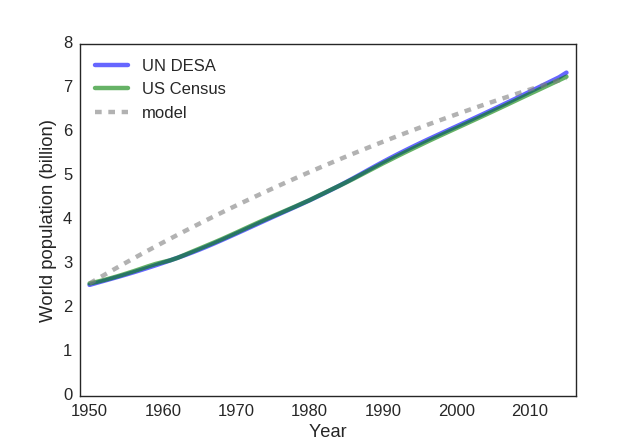

In [27]:
state.death_rate = 0.01
state.annual_growth = annual_growth * 1.7

run_model2(state)
plot_model(state)

## Proportional death, proportional birth

In [28]:
def run_model3(state):
    model = Series([])
    model[state.t0] = state.initial_pop
    for year in arange(state.t0+1, state.t_end+1):
        births = state.birth_rate * model[year-1]
        deaths = state.death_rate * model[year-1]
        model[year] = model[year-1] + births - deaths
    state.model = model

<IPython.core.display.Javascript object>


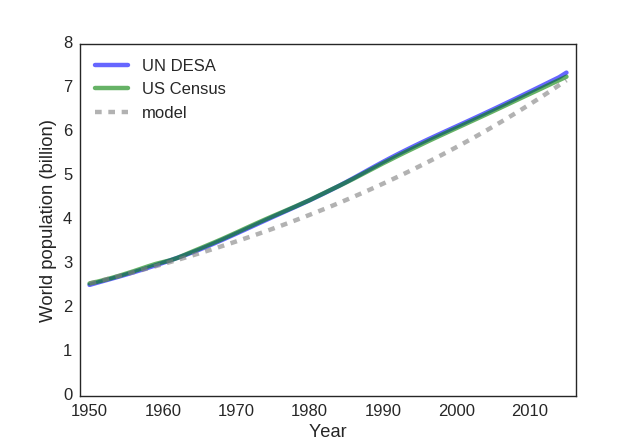

In [29]:
state.death_rate = 0.01
state.birth_rate = 0.026

run_model3(state)
plot_model(state)

### Net growth rate

In [30]:
def run_model3b(state):
    model = Series([])
    model[state.t0] = state.initial_pop
    for year in arange(state.t0+1, state.t_end+1):
        net_growth = state.alpha * model[year-1]
        model[year] = model[year-1] + net_growth
    state.model = model

<IPython.core.display.Javascript object>


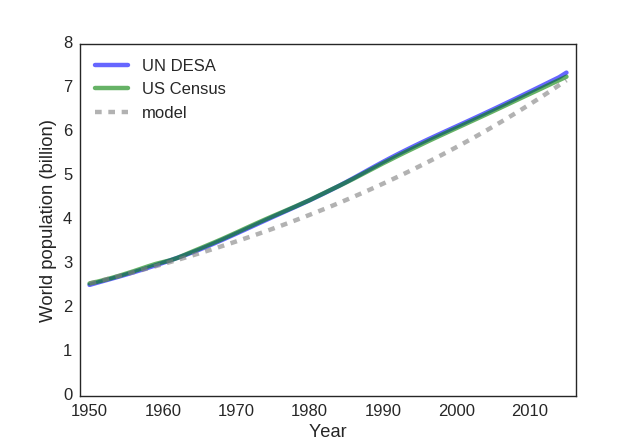

In [31]:
state.alpha = 0.016

run_model3b(state)
plot_model(state)

### Factoring out the update function

In [32]:
def run_any_model(state, update_func):
    model = Series([])
    model[state.t0] = state.initial_pop
    for year in arange(state.t0+1, state.t_end+1):
        pop = model[year-1]
        model[year] = update_func(year, pop, state)
    state.model = model

<IPython.core.display.Javascript object>


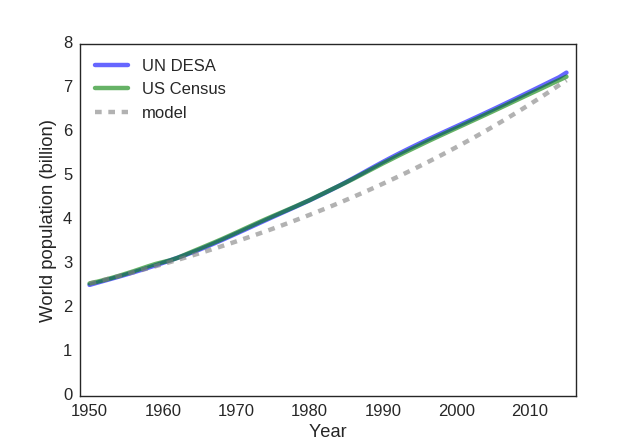

In [33]:
def update_func1(year, pop, state):
    net_growth = state.alpha * pop
    return pop + net_growth

state.alpha = 0.016

run_any_model(state, update_func1)
plot_model(state)

### Growth rate as a function of time

<IPython.core.display.Javascript object>


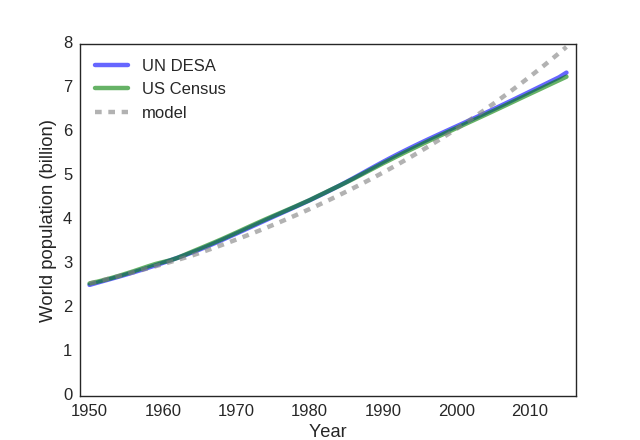

In [34]:
def update_func2(year, pop, state):
    if year < 1965:
        net_growth = state.alpha1 * pop
    else:
        net_growth = state.alpha2 * pop
    return pop + net_growth

state.alpha1 = 0.016
state.alpha2 = 0.018

run_any_model(state, update_func2)
plot_model(state)

### Quadratic growth

<IPython.core.display.Javascript object>


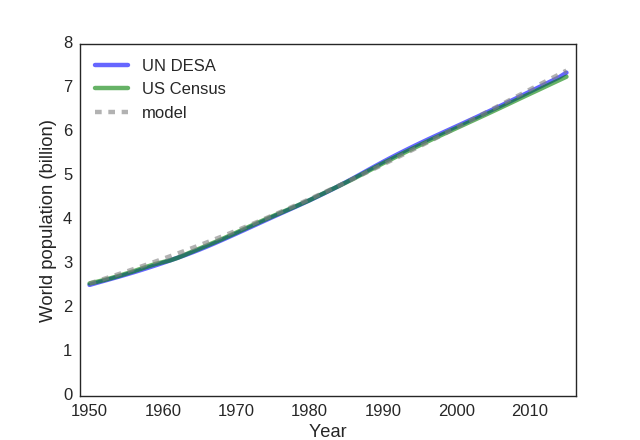

In [35]:
def update_func3(year, pop, state):
    net_growth = state.alpha * pop + state.beta * pop**2
    return pop + net_growth

state.alpha = 0.025
state.beta = -0.0018

run_any_model(state, update_func3)
plot_model(state)

### Reparameterizing

In [36]:
state.r = state.alpha
state.K = -state.alpha/state.beta

<IPython.core.display.Javascript object>


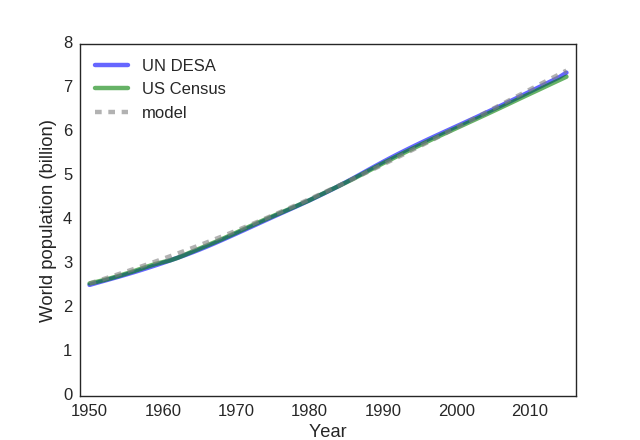

In [37]:
def update_func3b(year, pop, state):
    net_growth = state.r * pop * (1 - pop / state.K)
    return pop + net_growth

run_any_model(state, update_func3b)
plot_model(state)

In [38]:
state.K

13.88888888888889

<IPython.core.display.Javascript object>


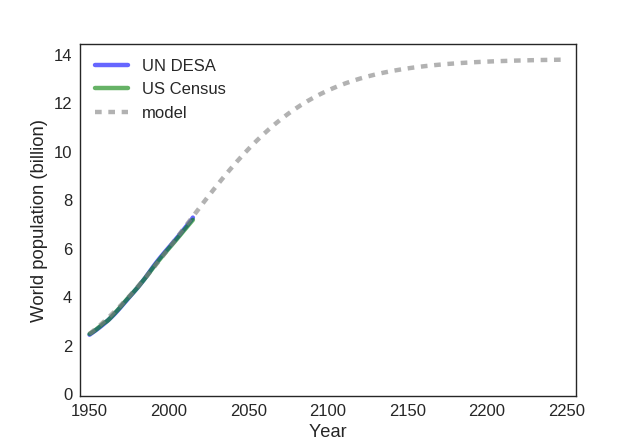

(0, 14.5)

In [39]:
state.t_end = 2250
run_any_model(state, update_func3b)
plot_model(state)
ylim([0, 14.5])

In [40]:
state.model[state.t_end]

13.856665141368708

### Comparing projections

In [41]:
df3 = dfs[3]
df3.head()

,United States Census Bureau (2015)[18],Population Reference Bureau (1973-2015)[6],United Nations Department of Economic and Social Affairs (2015)[7]
Year,,,
2016,7.334772e+09,NaN,7.432663e+09
2017,7.412779e+09,NaN,NaN
2018,7.490428e+09,NaN,NaN
2019,7.567403e+09,NaN,NaN
2020,7.643402e+09,NaN,7.758157e+09


In [42]:
df3.columns = ['census', 'prb', 'un']

In [43]:
def plot_projections(df):
    census_proj_billions = df.census / 1e9
    un_proj_billions = df.un / 1e9
    plot(un_proj_billions, 'o', color='blue', label='UN projection')
    plot(census_proj_billions, '.', color='green', label='US Census projection')

<IPython.core.display.Javascript object>


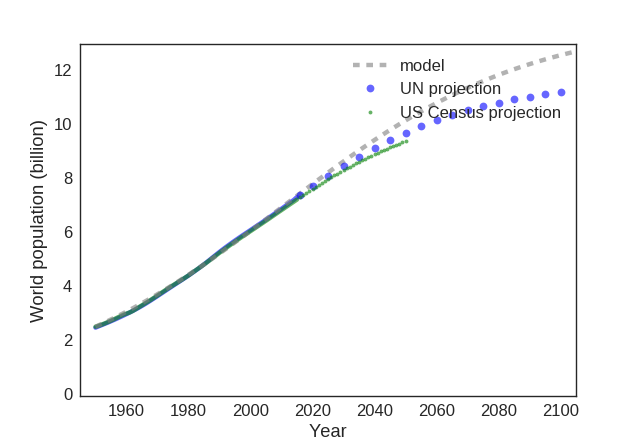

In [44]:
plot_model(state)
plot_projections(df3)
annotate(xlim=[1945, 2105], ylim=[0, 13])

In [45]:
remove_from_legend(['UN DESA', 'US Census'])


### Modeling prehistoric populations

In [49]:
df1 = dfs[1]
df1.head()

,Population Reference Bureau (1973–2015)[6],United Nations Department of Economic and Social Affairs (2015)[7],Maddison (2008)[8],HYDE (2010)[citation needed],Tanton (1994)[9],Biraben (1980)[10],McEvedy & Jones (1978)[11],Thomlinson (1975)[12],Durand (1974)[13],Clark (1967)[14]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[15],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.0,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df1.tail()

,Population Reference Bureau (1973–2015)[6],United Nations Department of Economic and Social Affairs (2015)[7],Maddison (2008)[8],HYDE (2010)[citation needed],Tanton (1994)[9],Biraben (1980)[10],McEvedy & Jones (1978)[11],Thomlinson (1975)[12],Durand (1974)[13],Clark (1967)[14]
Year,,,,,,,,,,
1913,NaN,NaN,1793.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,1860.0,1863.,1912.,NaN,NaN,NaN,NaN,NaN,1968.
1925,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
1930,NaN,2070.0,NaN,2092.,NaN,NaN,NaN,NaN,NaN,2145.
1940,NaN,2300.0,2299.,2307.,NaN,NaN,NaN,NaN,NaN,2340.


In [54]:
df1.columns = ['prb', 'un', 'maddison', 'hyde', 'tanton', 
              'biraben', 'mj', 'thomlinson', 'durand', 'clark']

<IPython.core.display.Javascript object>


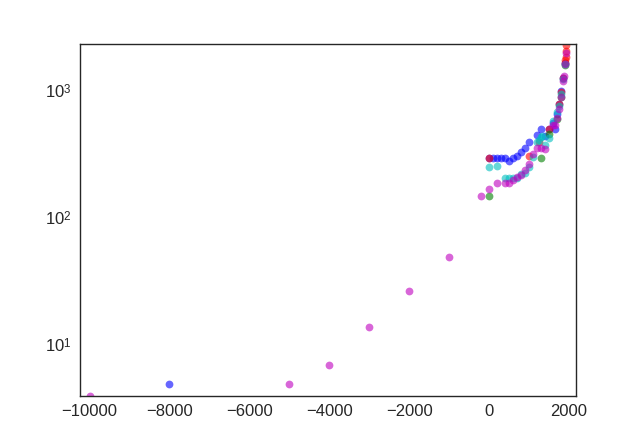

In [72]:
newfig()
plot(df1.prb, 'bo')
plot(df1.un, 'ro')
plot(df1.tanton, 'go')
plot(df1.biraben, 'co')
plot(df1.mj, 'mo')
yscale('log')